# Pandas API on Apache Spark
- Github: https://github.com/databricks/koalas#how-do-i-use-this-on-databricks
- Installation: https://koalas.readthedocs.io/en/latest/getting_started/install.html
- 10min to Koalas: https://koalas.readthedocs.io/en/latest/getting_started/10min.html

In [1]:
! pip install koalas==1.1.0

     |████████████████████████████████| 1.1 MB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/pmacharl/git-projects/personal/github.com/data_analysis_pandas_spark_koalas/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Below variables are to be set in the shell profile
# export SPARK_HOME=/Users/pmacharl/spark-2.4.4-bin-hadoop2.7
# export PATH=$PATH:$SPARK_HOME/bin
# export PYSPARK_SUBMIT_ARGS="pyspark-shell"
# export PYSPARK_DRIVER_PYTHON=/usr/local/bin/python3
# export PYSPARK_PYTHON=/usr/local/bin/python3

# Start cluster manually

In [ ]:
# https://spark.apache.org/docs/latest/spark-standalone.html
# ./sbin/start-master.sh 
# Start your spark server by navigating to SPARK_HOME/sbin and executing ./start-all.sh
# By default web Spark UI serves on :8080 in cluster mode. See all options for setting host, ip etc. in documentation

In [2]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
# https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkConf
config = SparkConf()
config.set("spark.driver.memory", "2g")
config.set("spark.executor.memory", "1g")
spark = SparkSession.builder.config(conf=config).master("spark://192.168.0.4:7077").appName("Analyzing Real Estate Sales").getOrCreate()

In [3]:
import pandas as pd
import numpy as np
import databricks.koalas as ks

In [4]:
df = spark.read.format('csv').option("header", "true").load('../Real_Estate_Sales_2001-2017.csv')

In [5]:
# Creating Koalas DataFrame from Spark DataFrame. to_koalas() is automatically attached to Spark DataFrame and available as an API when Koalas is imported.
kdf = df.to_koalas()

# Do all operations as if on Pandas
[pandas tutorial](https://github.com/techsparksguru/pandas_basic_training/blob/master/real_estate_sales.ipynb)

In [9]:
kdf.head(10)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440,252500,0.525,None,Two Family,None,None
1,2,900035,2009,07/20/2010 12:00:00 AM,Andover,1 DOGWOOD DRIVE,55600,99000,0.561616161616162,Vacant Land,NA,NA,NA
2,3,14011,2014,01/14/2015 12:00:00 AM,Andover,1 JUROVATY LANE,153100,190000,0.805789474,Residential,Single Family,NA,NA
3,4,80009,2008,01/21/2009 12:00:00 AM,Andover,1 ROSE LANE,116600,138900,0.839452843772498,Residential,Single Family,NA,NA
4,5,15006,2015,11/30/2015 12:00:00 AM,Andover,1 ROSE LANE,102900,50000,2.058,Residential,Single Family,14 - Foreclosure,PROPERTY WAS OWNED BY THE BANK
5,6,20030,2002,04/24/2003 12:00:00 AM,Andover,10 BAUSOLA RD,91800,189900,48.3412322274881,Residential,Single Family,0,NA
6,815907,173165,2017,08/01/2001 12:00:00 AM,Shelton,28 SUNSET DR,126980,238000,0.534,None,Single Family,None,None
7,8,30047,2003,04/19/2004 12:00:00 AM,Andover,10 CHESTER BRKS LN,56600,80000,70.75,Vacant Land,NA,0,NA
8,9,40003,2004,10/18/2004 12:00:00 AM,Andover,10 CHESTER BRKS LN,194100,446639,43.4579156768666,Residential,Single Family,7,NA
9,10,70005,2007,11/19/2007 12:00:00 AM,Andover,10 CHESTER BROOKS LN,313400,425000,0.737411764705882,Residential,Single Family,NA,NA


In [10]:
kdf.head(10).sort_values(by = 'ID')

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
9,10,70005,2007,11/19/2007 12:00:00 AM,Andover,10 CHESTER BROOKS LN,313400,425000,0.737411764705882,Residential,Single Family,NA,NA
1,2,900035,2009,07/20/2010 12:00:00 AM,Andover,1 DOGWOOD DRIVE,55600,99000,0.561616161616162,Vacant Land,NA,NA,NA
2,3,14011,2014,01/14/2015 12:00:00 AM,Andover,1 JUROVATY LANE,153100,190000,0.805789474,Residential,Single Family,NA,NA
3,4,80009,2008,01/21/2009 12:00:00 AM,Andover,1 ROSE LANE,116600,138900,0.839452843772498,Residential,Single Family,NA,NA
4,5,15006,2015,11/30/2015 12:00:00 AM,Andover,1 ROSE LANE,102900,50000,2.058,Residential,Single Family,14 - Foreclosure,PROPERTY WAS OWNED BY THE BANK
5,6,20030,2002,04/24/2003 12:00:00 AM,Andover,10 BAUSOLA RD,91800,189900,48.3412322274881,Residential,Single Family,0,NA
7,8,30047,2003,04/19/2004 12:00:00 AM,Andover,10 CHESTER BRKS LN,56600,80000,70.75,Vacant Land,NA,0,NA
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440,252500,0.525,None,Two Family,None,None
6,815907,173165,2017,08/01/2001 12:00:00 AM,Shelton,28 SUNSET DR,126980,238000,0.534,None,Single Family,None,None
8,9,40003,2004,10/18/2004 12:00:00 AM,Andover,10 CHESTER BRKS LN,194100,446639,43.4579156768666,Residential,Single Family,7,NA


In [11]:
kdf.dtypes

ID                 object
SerialNumber       object
ListYear           object
DateRecorded       object
Town               object
Address            object
AssessedValue      object
SaleAmount         object
SalesRatio         object
PropertyType       object
ResidentialType    object
NonUseCode         object
Remarks            object
dtype: object

In [12]:
kdf.columns

Index(['ID', 'SerialNumber', 'ListYear', 'DateRecorded', 'Town', 'Address',
       'AssessedValue', 'SaleAmount', 'SalesRatio', 'PropertyType',
       'ResidentialType', 'NonUseCode', 'Remarks'],
      dtype='object')

In [13]:
kdf.info()

<class 'databricks.koalas.frame.DataFrame'>
Index: 861597 entries, 0 to 861596
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               861597 non-null  object
 1   SerialNumber     861597 non-null  object
 2   ListYear         861597 non-null  object
 3   DateRecorded     861589 non-null  object
 4   Town             861597 non-null  object
 5   Address          861594 non-null  object
 6   AssessedValue    861292 non-null  object
 7   SaleAmount       830804 non-null  object
 8   SalesRatio       861596 non-null  object
 9   PropertyType     815904 non-null  object
 10  ResidentialType  861596 non-null  object
 11  NonUseCode       830867 non-null  object
 12  Remarks          826698 non-null  object
dtypes: object(13)

In [14]:
kdf.shape

(861597, 13)

In [15]:
kdf.size

861597

In [16]:
kdf.max()

Address                                           parking space only
AssessedValue                                                 999950
DateRecorded                                  12/31/2015 12:00:00 AM
ID                                                             99999
ListYear                                                        2017
NonUseCode                                                        NA
PropertyType                                             Vacant Land
Remarks            zoning changed from residential to commercial ...
ResidentialType                                          Vacant Land
SaleAmount                                                    999999
SalesRatio                                                        NA
SerialNumber                                                   99529
Town                                                       Woodstock
Name: 0, dtype: object

In [17]:
kdf[(kdf['SaleAmount'] > kdf['SaleAmount'].mean()) & (kdf['Town'] == 'Andover')]

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
8,9,40003,2004,10/18/2004 12:00:00 AM,Andover,10 CHESTER BRKS LN,194100,446639,43.4579156768666,Residential,Single Family,7,NA
9,10,70005,2007,11/19/2007 12:00:00 AM,Andover,10 CHESTER BROOKS LN,313400,425000,0.737411764705882,Residential,Single Family,NA,NA
10,11,40042,2004,05/23/2005 12:00:00 AM,Andover,10 DOGWOOD DR,218700,440000,49.7045454545455,Residential,Single Family,7,NA
25,26,30072,2003,08/16/2004 12:00:00 AM,Andover,11 DOGWOOD DR,45600,449900,10.13,Residential,Single Family,7,NA
26,27,100027,2010,07/11/2011 12:00:00 AM,Andover,11 DOGWOOD DRIVE,348600,450000,0.774666666666666,Residential,Single Family,NA,NA
27,28,40001,2004,10/12/2004 12:00:00 AM,Andover,11 SHADBLOW LN,132800,381900,34.7735009164703,Residential,Single Family,7,NA
31,32,50046,2005,07/11/2006 12:00:00 AM,Andover,11 WOOD FERN WAY,54900,465000,11.8064516129032,Residential,Single Family,7,NA
50,51,40626,2004,03/18/2005 12:00:00 AM,Andover,12 SHADBLOW LN,112200,455625,24.6255144032922,Residential,Single Family,7,NA
77,78,15024,2015,04/04/2016 12:00:00 AM,Andover,135 BEAR SWAMP RD,296560,550000,0.5392,Residential,Single Family,01 - Family,PROPERTY WAS SOLD FROM MOTHER TO SON
83,84,14023,2014,06/03/2015 12:00:00 AM,Andover,14 WOOD FERN WAY,244000,366000,0.666666667,Residential,Single Family,NA,NA


In [18]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
kdf_property_type = kdf.groupby(['PropertyType'])

In [42]:
# There seems to be an error, kdf is printing more than 10, maybe koalas need to mature
kdf_property_type.head(10)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440,252500,0.525,None,Two Family,None,None
6,815907,173165,2017,08/01/2001 12:00:00 AM,Shelton,28 SUNSET DR,126980,238000,0.534,None,Single Family,None,None
23,815908,173202,2017,08/23/2001 12:00:00 AM,Shelton,57 ADAMS DRIVE,370230,430500,0.86,None,Single Family,14 - Foreclosure,None
30,815909,170164,2017,05/29/2008 12:00:00 AM,Clinton,78 LIBERTY ST,153100,400000,0.383,None,Two Family,None,None
34,815910,170107,2017,06/13/2008 12:00:00 AM,Westbrook,16 HALLS RD,598100,800000,0.748,None,Two Family,None,IN-LAW APARTMENT
56,815911,170207,2017,07/03/2008 12:00:00 AM,Clinton,80 SHORE RD #2,119400,160000,0.746,None,Condo Family,None,None
69,815912,17698,2017,08/02/2008 12:00:00 AM,East Hartford,136 UNIVERSITY AVE.,127260,183500,0.694,None,Single Family,None,None
74,815913,170045,2017,05/07/2010 12:00:00 AM,Washington,378 NETTLETON HOLLOW RD,398720,369001,1.081,None,Single Family,18 - In Lieu Of Foreclosure,None
75,815914,170226,2017,07/13/2010 12:00:00 AM,Bloomfield,6 PINNEY RD,130690,215000,0.608,None,Single Family,01 - Family,None
113,815915,170263,2017,08/14/2010 12:00:00 AM,Bloomfield,10 SYCAMORE RD,122570,201000,0.61,None,Single Family,None,None


In [19]:
# Mean sale amount
kdf['SaleAmount'].mean()

360835.43889327685

In [20]:
# How many paid between my budget [300,000,350,000]
kdf[kdf['SaleAmount'].between(300000,350000)].count()

ID                 58735
SerialNumber       58735
ListYear           58735
DateRecorded       58734
Town               58735
Address            58735
AssessedValue      58719
SaleAmount         58735
SalesRatio         58735
PropertyType       55054
ResidentialType    58735
NonUseCode         55797
Remarks            55763
Name: 0, dtype: int64

In [22]:
# How many people paid as per my budget [300000,350000] grouped by Town
my_df = kdf[kdf['SaleAmount'].between(300000,350000)]
my_df.count()

ID                 58735
SerialNumber       58735
ListYear           58735
DateRecorded       58734
Town               58735
Address            58735
AssessedValue      58719
SaleAmount         58735
SalesRatio         58735
PropertyType       55054
ResidentialType    58735
NonUseCode         55797
Remarks            55763
Name: 0, dtype: int64

In [23]:
# How many people paid as per my budget [300000,350000] grouped by Town
my_df1 = my_df.groupby(['Town']).agg(COUNT=("ID","count"))
my_df1.count()

COUNT    169
Name: 0, dtype: int64

In [24]:
# Which town has most number of people that have paid the same as my budget?
my_df1[my_df1['COUNT'] == my_df1['COUNT'].max()]

,COUNT
Town,
Norwalk,2394


# Plotting

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
# https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkConf
config = SparkConf()
config.set("spark.driver.memory", "2g")
config.set("spark.executor.memory", "1g")
spark1 = SparkSession.builder.config(conf=config).master("spark://192.168.0.6:7077").appName("Plotting").getOrCreate()

In [27]:
# Read a csv file. df stands for DataFrame
df1 = spark1.read.format('csv').option("header", "true").load('../height_weight.csv')
kdf1 = df1.to_koalas()

In [28]:
kdf1.dtypes

sex       object
weight    object
height    object
repwt     object
repht     object
dtype: object

In [29]:
# notice the object reference is also being printed
kdf1.plot()

TypeError: no numeric data to plot

In [30]:
kdf2 = kdf1.astype('float')

<AxesSubplot:>

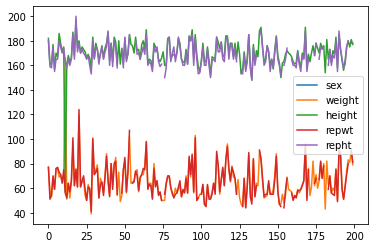

In [31]:
# notice the object reference is also being printed
kdf2.plot()

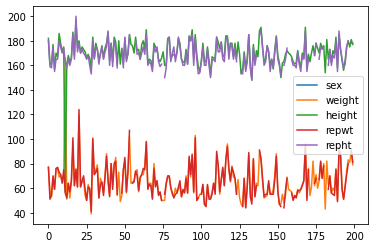

In [32]:
# assign to remove object reference. Index is used for x axis, and each column is plotted on y axis
ax = kdf2.plot()

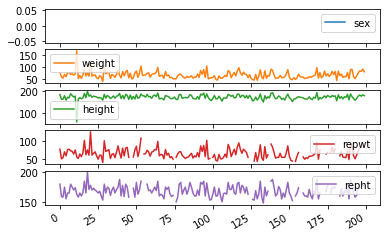

In [33]:
# subplots to put each column in its own plot 
ax = kdf2.plot(subplots=True)

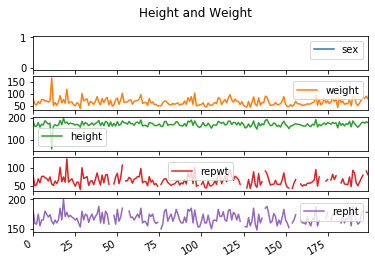

In [26]:
# Add a title 
ax = kdf2.plot(subplots=True, title="Height and Weight")

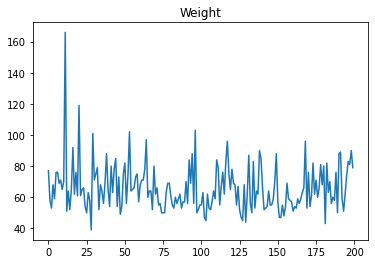

In [34]:
# plot specific column (observe how legend is not present when a column is selected, hence title helps)
ax = kdf2['weight'].plot(title="Weight")

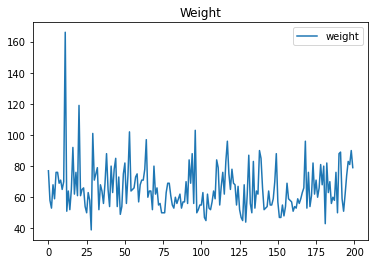

In [35]:
# or just use legend=True
ax = kdf2['weight'].plot(title="Weight", legend=True)

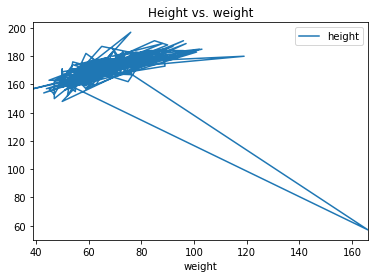

In [29]:
# Lets change x axis and not taking default index of dataframe. Lets say we want to plot height corresponding to weight
ax = kdf2.plot(title="Height vs. weight", x='weight', y='height')

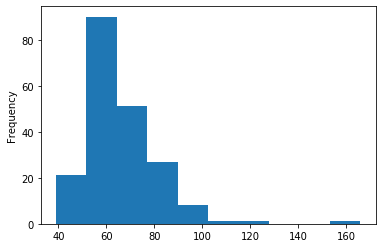

In [30]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
ax = kdf2['weight'].plot.hist()

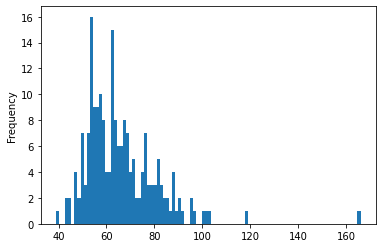

In [36]:
# Increase bins to spread out points, otherwise hist() will stuff all bars together like the above one
ax = kdf2['weight'].plot.hist(bins=100)

In [37]:
# In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of 
# numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 
# hence the terms box-and-whisker plot and box-and-whisker diagram. 
ax = kdf2['weight'].plot.box()

AttributeError: 'numpy.float32' object has no attribute '_get_object_id'

In [38]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
ax = kdf2.boxplot(column=['weight'])

PandasNotImplementedError: The method `pd.DataFrame.boxplot()` is not implemented yet.

In [39]:
ax = kdf2.boxplot(column=['weight','height','repwt','repht'])

PandasNotImplementedError: The method `pd.DataFrame.boxplot()` is not implemented yet.

# https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting

# Remove spark application

In [40]:
spark.stop()
spark1.stop()